In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [5]:
## CSV dosyasını okuyalım
df = pd.read_csv("datasetMalware33featues.csv")
#Veriler doğru bir şekilde çekilmiş mi kontrol amacıyla ilk 5 sütunu çekelim
df.head()

,FinFlagDist,SynFlagDist,RstFlagDist,PshFlagDist,AckFlagDist,DNSoverIP,TCPoverIP,UDPoverIP,MaxLen,MinLen,...,NumPorts,FlowLEN,FlowLENrx,repeated_pkts_ratio,NumCon,NumIPdst,Start_flow,DeltaTimeFlow,HTTPpkts,label
0,0.478168,1.144246,-0.716937,0.671470,1.089129,-0.154516,0.154711,-0.156991,-0.009901,-1.028609,...,-0.889691,0.479515,0.284428,0.862578,5.253913,5.142702,0.562400,-0.052248,1.487787,1.0
1,-1.204652,0.316746,-0.716937,1.537622,1.135609,-0.154516,0.154711,-0.156991,0.722669,0.628640,...,0.293799,1.301840,-0.036629,-0.908981,-0.190341,-0.194497,0.562400,-0.315281,1.786307,1.0
2,-1.204652,-0.216194,-0.716937,-0.457715,-0.848148,-0.154516,0.154711,-0.156991,-0.172436,0.628640,...,-0.889691,-0.452523,-0.049479,-0.671509,-0.190341,-0.194497,0.562400,-1.197897,0.583908,1.0
3,0.478168,0.636365,-0.716937,1.615480,1.274407,-0.154516,0.154711,-0.156991,0.722669,0.628640,...,0.823293,1.416370,-0.042111,-1.626711,-0.190341,-0.194497,0.562400,-0.097754,1.805515,1.0
4,1.747840,1.867679,1.867097,0.903129,1.473227,6.778562,-7.182148,6.836627,0.485384,0.628640,...,1.116241,0.868445,0.678529,0.902818,5.253913,5.142781,0.563213,0.885878,1.614688,1.0


In [7]:
# Eksik verileri (NaN değerlerini) sütun ortalamalarıyla dolduralım
df.fillna(df.mean(), inplace=True)

# Eksik veri kalmış mı kontrol edelim
missing_values = df.isnull().sum()
missing_values

FinFlagDist            0
SynFlagDist            0
RstFlagDist            0
PshFlagDist            0
AckFlagDist            0
DNSoverIP              0
TCPoverIP              0
UDPoverIP              0
MaxLen                 0
MinLen                 0
StdDevLen              0
AvgLen                 0
MaxIAT                 0
MinIAT                 0
AvgIAT                 0
AvgWinFlow             0
PktsIOratio            0
1stPktLen              0
MaxLenrx               0
MinLenrx               0
StdDevLenrx            0
AvgLenrx               0
MinIATrx               0
AvgIATrx               0
NumPorts               0
FlowLEN                0
FlowLENrx              0
repeated_pkts_ratio    0
NumCon                 0
NumIPdst               0
Start_flow             0
DeltaTimeFlow          0
HTTPpkts               0
label                  0
dtype: int64

In [9]:
#Normalizasyon işlemi
scaler = MinMaxScaler()

# 'label' sütunu hariç tüm sütunları ölçeklendirelim
df_scaled = df.copy()
df_scaled[df_scaled.columns[:-1]] = scaler.fit_transform(df_scaled[df_scaled.columns[:-1]])

# Ölçeklendirilmiş verinin ilk beş satırını gösterelim
df_scaled.head()

,FinFlagDist,SynFlagDist,RstFlagDist,PshFlagDist,AckFlagDist,DNSoverIP,TCPoverIP,UDPoverIP,MaxLen,MinLen,...,NumPorts,FlowLEN,FlowLENrx,repeated_pkts_ratio,NumCon,NumIPdst,Start_flow,DeltaTimeFlow,HTTPpkts,label
0,0.448414,0.613970,0.000000,0.503470,0.629803,0.0,1.000000e+00,0.0,0.178426,0.417328,...,0.000000,0.471063,0.618110,0.885662,1.0,0.999985,0.008872,0.274117,0.856167,1.0
1,0.000000,0.414872,0.000000,0.719140,0.639137,0.0,1.000000e+00,0.0,0.266543,0.640945,...,0.412948,0.661491,0.614415,0.465114,0.0,0.000000,0.008872,0.219039,0.969222,1.0
2,0.000000,0.286645,0.000000,0.222305,0.240782,0.0,1.000000e+00,0.0,0.158876,0.640945,...,0.000000,0.255227,0.614267,0.521487,0.0,0.000000,0.008872,0.034222,0.513850,1.0
3,0.448414,0.491773,0.000000,0.738527,0.667009,0.0,1.000000e+00,0.0,0.266543,0.640945,...,0.597702,0.688014,0.614352,0.294733,0.0,0.000000,0.008872,0.264588,0.976497,1.0
4,0.786739,0.788029,0.990069,0.561153,0.706934,1.0,5.273559e-14,1.0,0.238001,0.640945,...,0.699919,0.561128,0.622646,0.895214,1.0,1.000000,0.019382,0.470557,0.904227,1.0


In [10]:
# Veri setinin istatistiksel özetini alalım
statistical_summary = df_scaled.describe(percentiles=[.25, .5, .75])

# İstenen istatistiksel bilgileri gösterelim
statistical_summary.transpose()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,count,mean,std,min,25%,50%,75%,max
FinFlagDist,34349.0,0.195081,0.251625,0.0,0.000000,0.000000,0.312706,1.0
SynFlagDist,34349.0,0.255094,0.242855,0.0,0.000000,0.286645,0.414872,1.0
RstFlagDist,34349.0,0.354331,0.392676,0.0,0.000000,0.000000,0.731024,1.0
PshFlagDist,34349.0,0.271002,0.270463,0.0,0.000000,0.222305,0.472861,1.0
AckFlagDist,34349.0,0.344469,0.219700,0.0,0.109738,0.317183,0.501729,1.0
DNSoverIP,34349.0,0.038550,0.187834,0.0,0.000000,0.000000,0.000000,1.0
TCPoverIP,34349.0,0.965576,0.171410,0.0,1.000000,1.000000,1.000000,1.0
UDPoverIP,34349.0,0.037511,0.182487,0.0,0.000000,0.000000,0.000000,1.0
MaxLen,34349.0,0.140099,0.135903,0.0,0.005417,0.130057,0.266543,1.0
MinLen,34349.0,0.586614,0.097637,0.0,0.640945,0.640945,0.640945,1.0


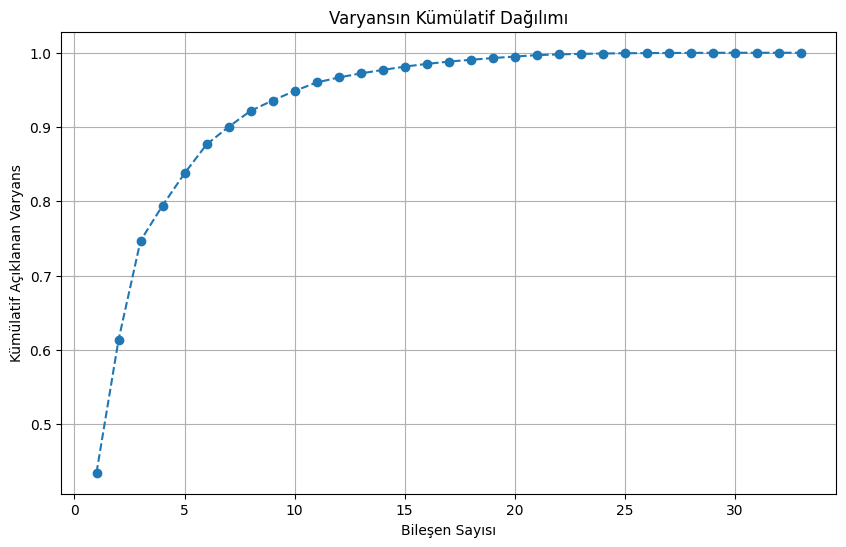

In [11]:
# 'label' sütunu hariç veriyi PCA için hazırlayalım
X = df_scaled.drop('label', axis=1)

# Tüm bileşenler için PCA uygulayalım
pca = PCA().fit(X)

# Kümülatif varyansı hesaplayalım
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Kümülatif varyans grafiğini çizelim
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title("Varyansın Kümülatif Dağılımı")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Açıklanan Varyans")
plt.grid(True)
plt.show()

In [14]:
# Veriyi %95 varyansı koruyacak şekilde bileşen sayısıyla PCA uygulayalım
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X)
# Yeni bileşen sayısını gösterelim
num_components = X_pca.shape[1]
num_components

11

In [15]:
# PCA sonrası oluşturulan bileşenler için DataFrame oluşturalım
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(num_components)])

# PCA sonrası veri setinin istatistiksel özetini alalım
pca_statistical_summary = df_pca.describe(percentiles=[.25, .5, .75])

# İstenen istatistiksel bilgileri gösterelim
pca_statistical_summary.transpose()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,count,mean,std,min,25%,50%,75%,max
PC1,34349.0,-1.403337e-15,0.836314,-1.051942,-0.990523,0.143990,0.733738,2.007963
PC2,34349.0,5.295611e-16,0.536148,-0.910824,-0.333041,-0.047855,0.091777,2.368888
PC3,34349.0,4.302684e-17,0.463468,-1.299646,-0.182903,0.129869,0.169399,1.643678
PC4,34349.0,4.137196e-17,0.276229,-0.967991,-0.139458,-0.024663,0.135824,1.254236
PC5,34349.0,-2.449220e-16,0.263975,-1.170125,-0.157468,0.058019,0.106026,1.509929
PC6,34349.0,5.478682e-16,0.250160,-1.012831,-0.145247,-0.027805,0.120692,1.081986
PC7,34349.0,-1.026025e-16,0.194937,-0.650024,-0.108535,0.012198,0.074114,0.888625
PC8,34349.0,-5.771388e-17,0.186166,-1.127232,-0.044699,-0.009975,0.071320,1.773557
PC9,34349.0,-3.123583e-17,0.149748,-0.787361,-0.085128,0.041709,0.052144,0.812937
PC10,34349.0,-3.857935e-17,0.144178,-0.727954,-0.049162,0.053665,0.063728,0.747553


/var/folders/jt/4vb066tj49z1vwb23wsjytsc0000gn/T/ipykernel_6396/131111229.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_scaled.hist(ax=plt.gca(), bins=50)


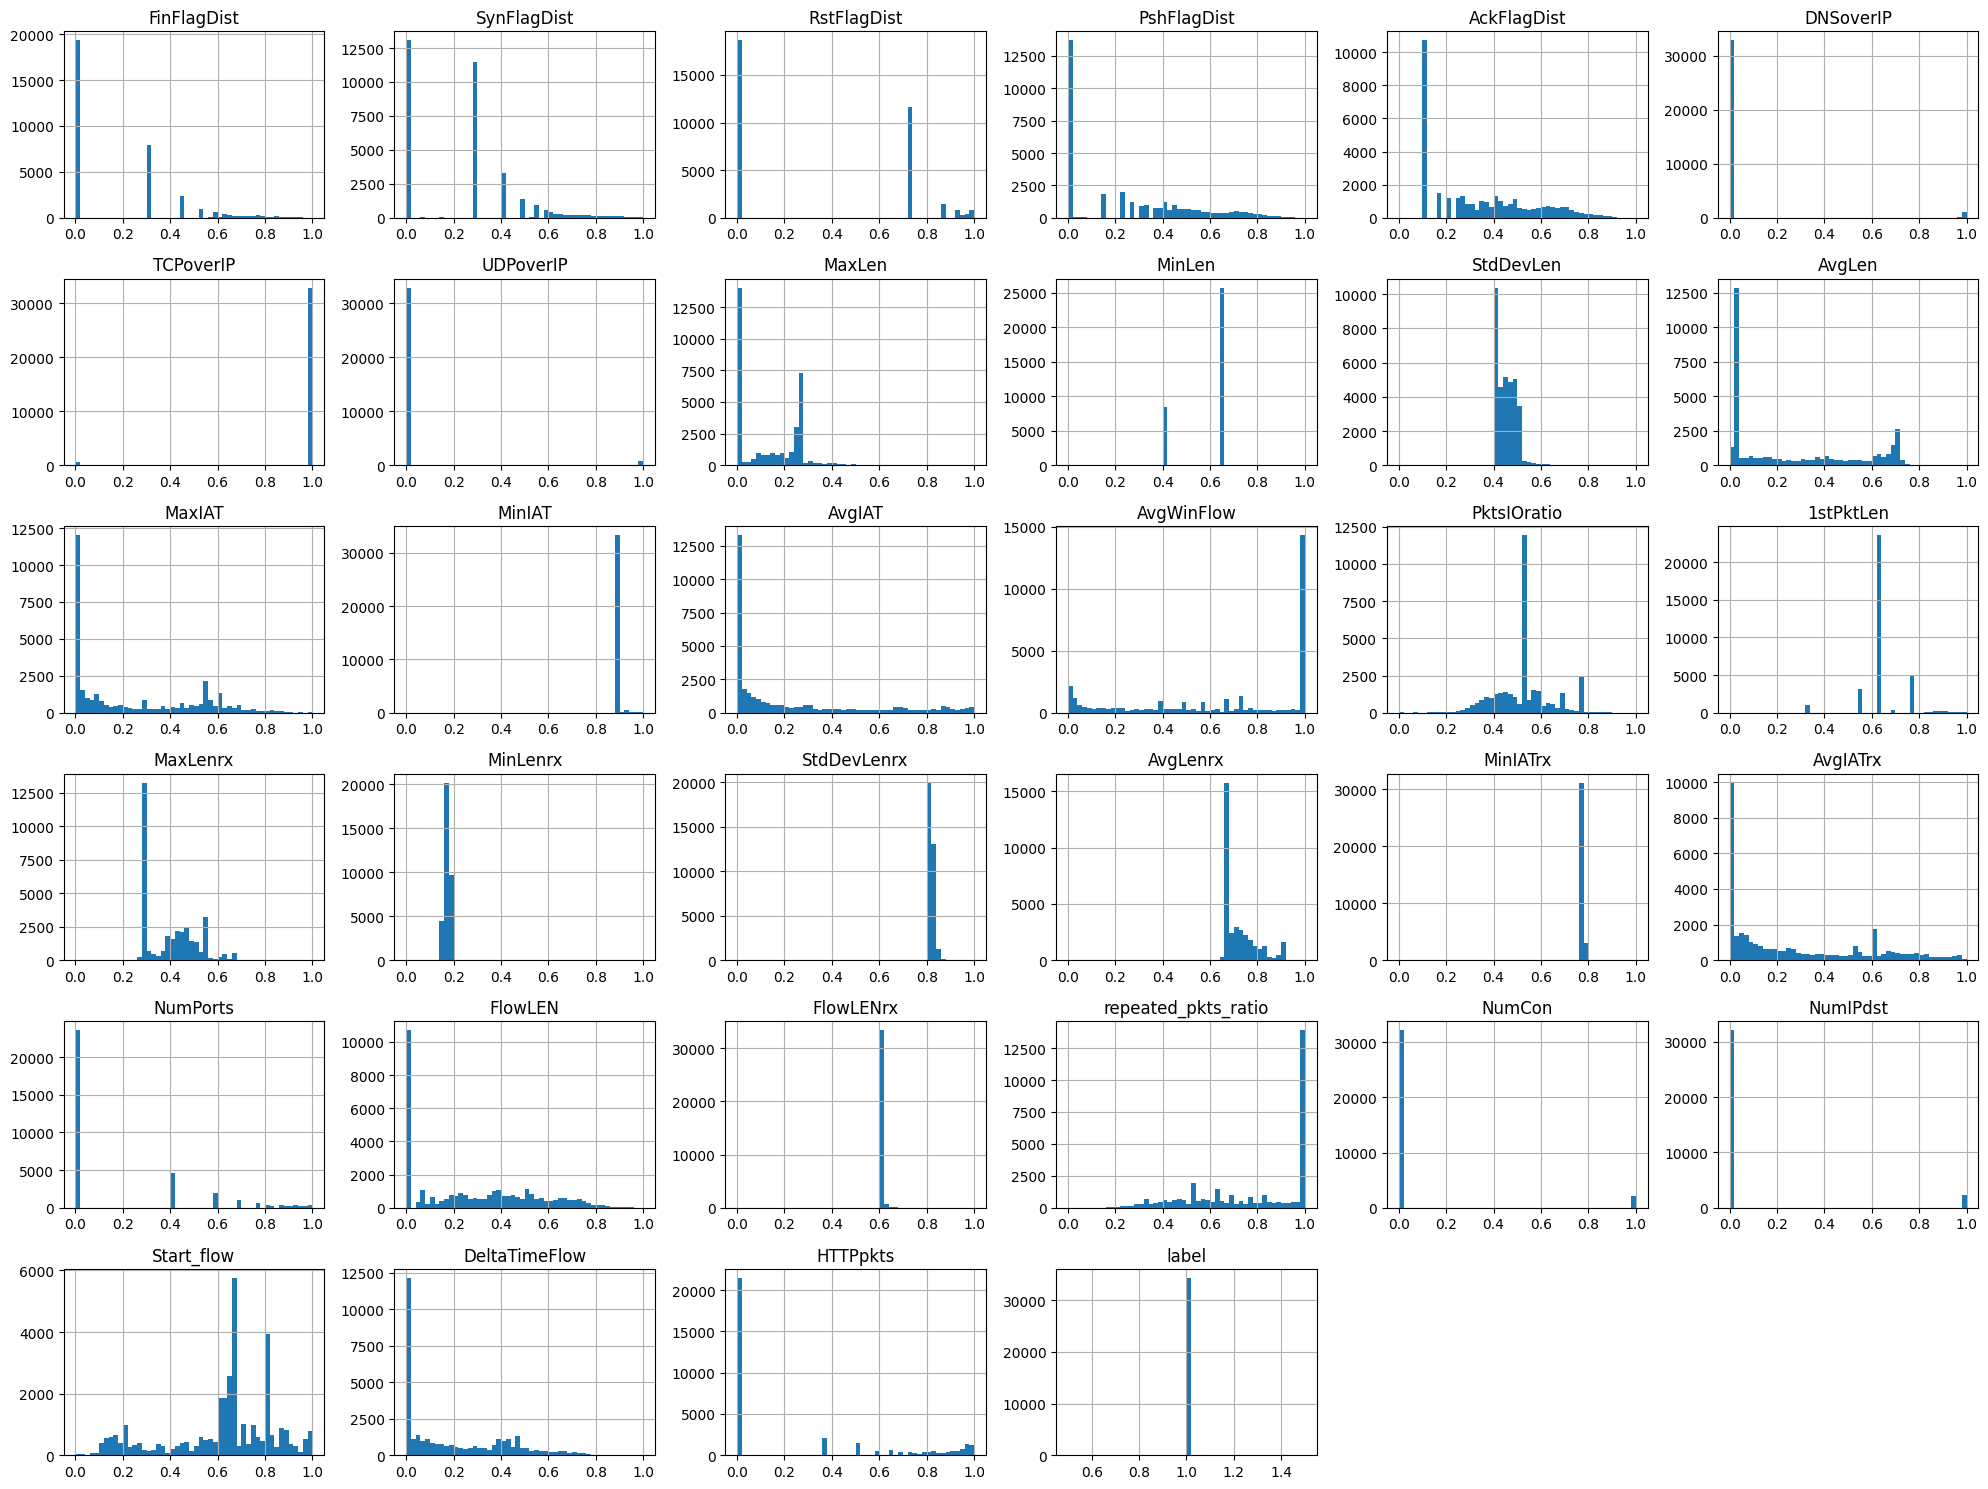

In [16]:
# Normalizasyon sonrası veri setinin histogramını çizelim
plt.figure(figsize=(20, 15))
df_scaled.hist(ax=plt.gca(), bins=50)
plt.tight_layout()
plt.show()

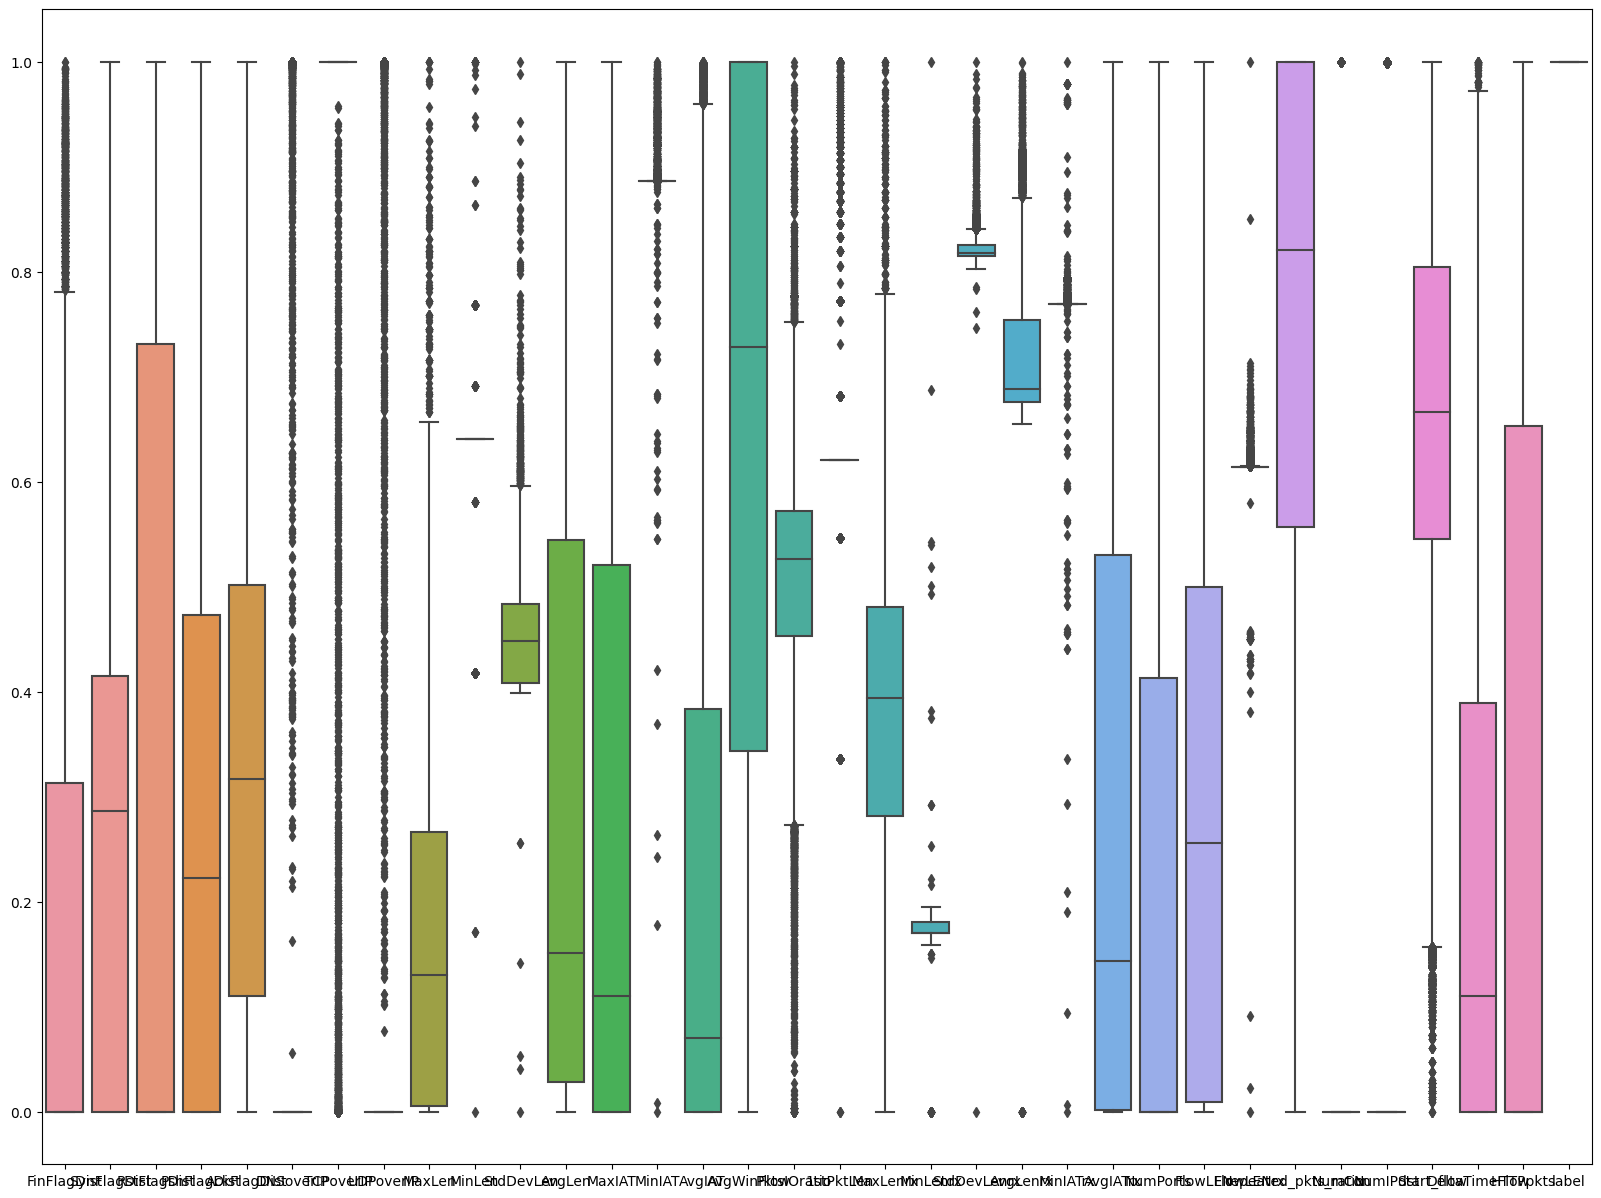

In [18]:
# Normalizasyon sonrası veri setinin mum grafiğini çizelim
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_scaled)
plt.show()